In [2]:
import json
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [3]:
runLocationFile = open("runlocation.txt")
runLocation = runLocationFile.readline()

df = pd.DataFrame()
for root, dirs, files in os.walk(runLocation):
    for name in files:
        if name.endswith(".run"):
            f = open(root + '/' + name)
            temp_run = f.readline()
            f.close()
            temp_dict = json.loads(temp_run)
            temp_dataFrame = pd.DataFrame([temp_dict])
            df = pd.concat([df, temp_dataFrame], ignore_index= True)

In [4]:
df.head()

,gold_per_floor,floor_reached,playtime,items_purged,score,play_id,local_time,is_ascension_mode,campfire_choices,neow_cost,...,event_choices,is_beta,boss_relics,items_purged_floors,is_endless,potions_floor_spawned,killed_by,ascension_level,special_seed,daily_mods
0,"[113, 130, 12, 12, 26, 26, 53, 53, 53, 69, 92,...",16,451,[Clash],216,f54f60e6-8ba3-4c7a-9e52-0ad9a61fe447,20220718170453,True,"[{'data': 'Inflame', 'floor': 6, 'key': 'SMITH...",TEN_PERCENT_HP_LOSS,...,"[{'damage_healed': 0, 'gold_gain': 0, 'player_...",False,[],[3],False,"[1, 10, 11]",Hexaghost,20,NaN,NaN
1,"[119, 138, 155, 155, 155, 188, 188, 199, 224, ...",51,2629,[Fire Breathing],1667,27f8c62f-e147-49a3-bf6b-eccc3bbaf7b3,20240501191739,True,"[{'floor': 7.0, 'key': 'REST'}, {'floor': 15.0...",NONE,...,"[{'damage_healed': 0.0, 'max_hp_gain': 0.0, 'm...",False,"[{'not_picked': ['Runic Dome', 'Philosopher's ...",[36],False,"[1, 2, 8, 14, 16, 21, 24, 27, 30, 31, 33, 35, ...",Donu and Deca,20,0.0,NaN
2,"[20, 70, 84, 95, 112, 112, 125, 125, 172, 207,...",23,755,[Strike_R],410,71eca2be-bde1-4a59-b699-b2256511217d,20220423073516,True,"[{'data': 'Uppercut', 'floor': 6, 'key': 'SMIT...",NO_GOLD,...,"[{'damage_healed': 0, 'gold_gain': 50, 'player...",False,"[{'not_picked': ['Empty Cage', 'Sozu'], 'picke...",[20],False,"[3, 4, 16, 21]",Book of Stabbing,20,NaN,NaN
3,"[369, 18, 28, 28, 43, 76, 76, 101, 101, 101, 1...",40,1499,"[Strike_R, Normality]",956,a4b5a97b-d652-4bbc-bba5-d491ca379521,20220724223004,True,"[{'data': 'Bash', 'floor': 7.0, 'key': 'SMITH'...",TEN_PERCENT_HP_LOSS,...,"[{'damage_healed': 0.0, 'max_hp_gain': 0.0, 'm...",False,"[{'not_picked': ['Runic Pyramid', 'Mark of Pai...","[19, 38]",False,"[5, 6, 8, 11, 14, 18, 22, 23, 28, 30, 31, 37]",Giant Head,20,0.0,NaN
4,"[216, 228, 10, 30, 50, 50, 82, 99, 99, 125, 14...",16,627,[],252,7e3796ad-0f20-4779-899e-d940d5d1e229,20240417143139,True,"[{'data': 'Perfected Strike', 'floor': 6.0, 'k...",NONE,...,[],False,[],[],False,"[4, 5, 7, 12]",The Guardian,20,0.0,NaN


In [5]:
# Filter for ascension 20 
asc_20_mask = df['ascension_level'] == 20
asc_20_mask
df = df[asc_20_mask]

In [6]:
gold_per_floor_winning = []
ironclad_gold_per_floor_winning = []
silent_gold_per_floor_winning = []
defect_gold_per_floor_winning = []
watcher_gold_per_floor_winning = []

In [7]:
for i in range(df.shape[0]): 
    floor_reached_index = df.columns.get_loc('floor_reached')
    if df.iloc[i, floor_reached_index] == 57: 
        gold_per_floor_col_index = df.columns.get_loc('gold_per_floor')
        tmp_list = df.iloc[i,gold_per_floor_col_index]
        gold_per_floor_winning.append(tmp_list)
        char_chosen_col_index = df.columns.get_loc('character_chosen')
        char_chosen = df.iloc[i, char_chosen_col_index]
        if char_chosen == 'IRONCLAD':
            ironclad_gold_per_floor_winning.append(tmp_list)
        elif char_chosen == 'THE_SILENT': 
            silent_gold_per_floor_winning.append(tmp_list)
        elif char_chosen == 'DEFECT':
            defect_gold_per_floor_winning.append(tmp_list)
        else : 
            watcher_gold_per_floor_winning.append(tmp_list)

In [8]:
# The * operator 'unpacks' a list, that is to say that it passes all elements of the iterable into the function
# in this case all sub-lists, from list_of_lists, are passed as arguments in the zip function
# This results in a zip object where every ith element of the zip object contains the ith element of 
# each of the sub-list 
def average_gold_per_floor(list_of_lists): 
    average = [sum(sub_list) / len(sub_list) for sub_list in zip(*list_of_lists)]
    return average

def max_gold_per_floor(list_of_lists): 
    max_list = [max(sub_list) for sub_list in zip(*list_of_lists)]
    return max_list

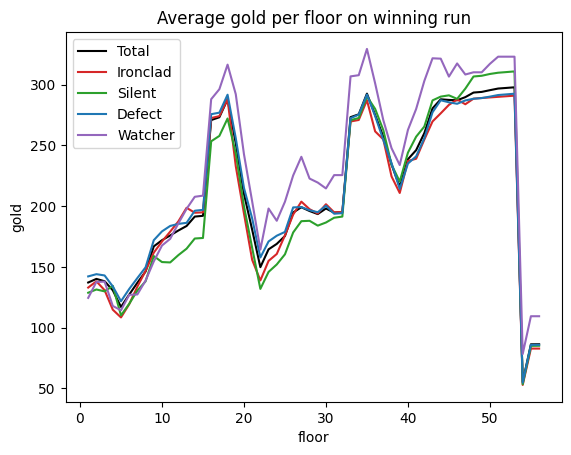

In [9]:
total_average_gold_per_floor_winning = average_gold_per_floor(gold_per_floor_winning)
average_ironclad_gold_per_floor_winning = average_gold_per_floor(ironclad_gold_per_floor_winning)
average_silent_gold_per_floor_winning = average_gold_per_floor(silent_gold_per_floor_winning)
average_defect_gold_per_floor_winning = average_gold_per_floor(defect_gold_per_floor_winning)
average_watcher_gold_per_floor_winning = average_gold_per_floor(watcher_gold_per_floor_winning)


floor_list_index = [i for i in range(1,57)]
plt.plot(floor_list_index, total_average_gold_per_floor_winning, 'k', label = 'Total')
plt.plot(floor_list_index, average_ironclad_gold_per_floor_winning, 'tab:red', label = 'Ironclad')
plt.plot(floor_list_index, average_silent_gold_per_floor_winning, 'tab:green', label = 'Silent')
plt.plot(floor_list_index, average_defect_gold_per_floor_winning, 'tab:blue', label = 'Defect')
plt.plot(floor_list_index, average_watcher_gold_per_floor_winning, 'tab:purple', label = 'Watcher')
plt.legend()
plt.ylabel('gold')
plt.xlabel('floor')
plt.title('Average gold per floor on winning run')
plt.show()

# add legend, axes labels, title later

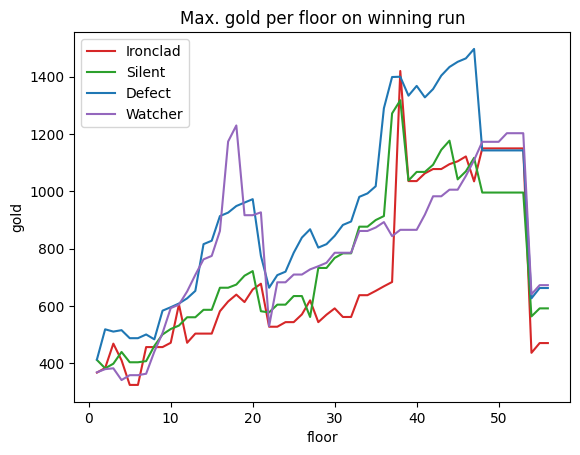

In [10]:
max_ironclad_gold_per_floor_winning = max_gold_per_floor(ironclad_gold_per_floor_winning)
max_silent_gold_per_floor_winning = max_gold_per_floor(silent_gold_per_floor_winning)
max_defect_gold_per_floor_winning = max_gold_per_floor(defect_gold_per_floor_winning)
max_watcher_gold_per_floor_winning = max_gold_per_floor(watcher_gold_per_floor_winning)

plt.plot(floor_list_index, max_ironclad_gold_per_floor_winning, 'tab:red', label = 'Ironclad')
plt.plot(floor_list_index, max_silent_gold_per_floor_winning, 'tab:green', label = 'Silent')
plt.plot(floor_list_index, max_defect_gold_per_floor_winning, 'tab:blue', label = 'Defect')
plt.plot(floor_list_index, max_watcher_gold_per_floor_winning, 'tab:purple', label = 'Watcher')
plt.legend()
plt.ylabel('gold')
plt.xlabel('floor')
plt.title('Max. gold per floor on winning run')
plt.show()
# add legend, axes labels, title later
# The graph shouldn't be a line, scatter plot??? or the graphs with points joined by lines. 
# Don't know what they are called

In [11]:
# make all the lists in the gold_per_floor column of length 56, 
# the max no. of floors. Enable calculation of average gold per floor
def to_max_floor_length(df): 
    max_floor = 56
    to_max_floor = lambda x: x + [0 for i in range(max_floor - len(x))]
    df['gold_per_floor'] = df['gold_per_floor'].apply(to_max_floor)

to_max_floor_length(df)

In [12]:
total_gold_per_floor = []
ironclad_gold_per_floor = []
silent_gold_per_floor = []
defect_gold_per_floor = []
watcher_gold_per_floor = []

In [13]:
# get average gold per floor for all runs
for i in range(df.shape[0]): 
    gold_per_floor_col_index = df.columns.get_loc('gold_per_floor')
    tmp_list = df.iloc[i,gold_per_floor_col_index]
    total_gold_per_floor.append(tmp_list)
    char_chosen_col_index = df.columns.get_loc('character_chosen')
    char_chosen = df.iloc[i, char_chosen_col_index]
    if char_chosen == 'IRONCLAD':
        ironclad_gold_per_floor.append(tmp_list)
    elif char_chosen == 'THE_SILENT': 
        silent_gold_per_floor.append(tmp_list)
    elif char_chosen == 'DEFECT':
        defect_gold_per_floor.append(tmp_list)
    else : 
        watcher_gold_per_floor.append(tmp_list)

In [14]:
total_average_gold_per_floor = average_gold_per_floor(total_gold_per_floor)
average_ironclad_gold_per_floor = average_gold_per_floor(ironclad_gold_per_floor)
average_silent_gold_per_floor = average_gold_per_floor(silent_gold_per_floor)
average_defect_gold_per_floor = average_gold_per_floor(defect_gold_per_floor)
average_watcher_gold_per_floor = average_gold_per_floor(watcher_gold_per_floor)

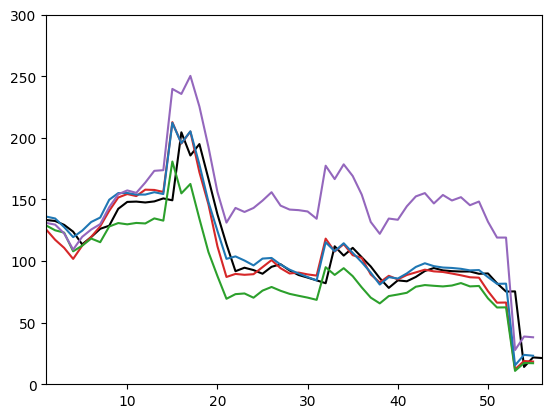

In [15]:
plt.plot(floor_list_index, total_average_gold_per_floor, 'k'
        , average_ironclad_gold_per_floor, 'tab:red'
        , average_silent_gold_per_floor, 'tab:green'
        , average_defect_gold_per_floor, 'tab:blue'
        , average_watcher_gold_per_floor, 'tab:purple')
plt.axis([1,56,0,300])
plt.show()
# add legend, axes labels, title later

In [16]:
neow_bonus_df = df[['neow_cost', 'neow_bonus', 'floor_reached']].copy()
neow_bonus_freq = neow_bonus_df.groupby(['neow_cost', 'neow_bonus'], as_index = False).count()
neow_bonus_freq.rename(columns = {'floor_reached': 'frequency'}, inplace = True)
neow_bonus_freq.head()

,neow_cost,neow_bonus,frequency
0,,,7
1,CURSE,ONE_RARE_RELIC,21
2,CURSE,RANDOM_COLORLESS_2,28
3,CURSE,THREE_RARE_CARDS,26
4,CURSE,TRANSFORM_TWO_CARDS,45


In [17]:
killed_heart = neow_bonus_df['floor_reached'] == 57
neow_bonus_killed_heart_df = neow_bonus_df[killed_heart]
neow_bonus_killed_heart_freq = neow_bonus_killed_heart_df.groupby(['neow_cost', 'neow_bonus'],
                               as_index=False).count()
neow_bonus_killed_heart_freq.rename(columns = {'floor_reached': 'win_frequency'}, inplace = True)
neow_bonus_killed_heart_freq.head()

,neow_cost,neow_bonus,win_frequency
0,CURSE,ONE_RARE_RELIC,5
1,CURSE,RANDOM_COLORLESS_2,7
2,CURSE,THREE_RARE_CARDS,3
3,CURSE,TRANSFORM_TWO_CARDS,4
4,CURSE,TWO_FIFTY_GOLD,39


In [18]:
## NEOW BONUS AND COST WIN RATES
neow_bonus_winrate = pd.merge(neow_bonus_freq, neow_bonus_killed_heart_freq, how = 'left')
neow_bonus_winrate['win_rate'] = neow_bonus_winrate['win_frequency']/neow_bonus_winrate['frequency'] * 100
neow_bonus_winrate.sort_values(by ='win_rate', ascending = False)

,neow_cost,neow_bonus,frequency,win_frequency,win_rate
26,PERCENT_DAMAGE,REMOVE_TWO,11,5.0,45.454545
11,NONE,REMOVE_CARD,104,36.0,34.615385
23,NO_GOLD,TWENTY_PERCENT_HP_BONUS,7,2.0,28.571429
5,CURSE,TWO_FIFTY_GOLD,147,39.0,26.530612
32,TEN_PERCENT_HP_LOSS,REMOVE_TWO,90,23.0,25.555556
18,NO_GOLD,ONE_RARE_RELIC,127,32.0,25.196850
2,CURSE,RANDOM_COLORLESS_2,28,7.0,25.000000
17,NONE,UPGRADE_CARD,272,67.0,24.632353
33,TEN_PERCENT_HP_LOSS,THREE_RARE_CARDS,127,31.0,24.409449
35,TEN_PERCENT_HP_LOSS,TWO_FIFTY_GOLD,171,41.0,23.976608


In [19]:
## INSTANT LEAVE NEOW BONUSES
zero_floors = neow_bonus_df['floor_reached'] == 0
zero_floors_df = neow_bonus_df[zero_floors]
zero_floors_df = zero_floors_df.groupby(['neow_cost', 'neow_bonus'], as_index = False).count()
zero_floors_df = zero_floors_df.rename(columns= {'floor_reached' : 'frequency'})
zero_floors_df.sort_values(by = 'frequency', ascending = False)

,neow_cost,neow_bonus,frequency
3,NONE,BOSS_RELIC,24
10,NO_GOLD,RANDOM_COLORLESS_2,21
16,TEN_PERCENT_HP_LOSS,RANDOM_COLORLESS_2,17
14,PERCENT_DAMAGE,RANDOM_COLORLESS_2,10
0,,,7
1,CURSE,RANDOM_COLORLESS_2,5
15,PERCENT_DAMAGE,THREE_RARE_CARDS,4
5,NONE,ONE_RANDOM_RARE_CARD,3
12,NO_GOLD,TRANSFORM_TWO_CARDS,2
4,NONE,HUNDRED_GOLD,2


In [20]:
## WIN RATES BY NEOW BONUS
neow_bonus_total = neow_bonus_df.groupby(['neow_bonus'], as_index = False).count()
neow_bonus_total.drop(['floor_reached'], axis = 1, inplace = True)
neow_bonus_total.rename(columns = {'neow_cost' : 'frequency'}, inplace = True)
neow_bonus_killed_heart = neow_bonus_killed_heart_df.groupby(['neow_bonus'], as_index = False).count()
neow_bonus_killed_heart.drop(['floor_reached'], axis = 1, inplace = True)
neow_bonus_killed_heart.rename(columns = {'neow_cost' : 'win_frequency'}, inplace = True)
neow_bonus_merge = pd.merge(neow_bonus_total, neow_bonus_killed_heart, how = 'left')
neow_bonus_merge['win_rate'] = neow_bonus_merge['win_frequency']/ neow_bonus_merge['frequency'] * 100
neow_bonus_merge.sort_values(by = 'win_rate', ascending = False)

,neow_bonus,frequency,win_frequency,win_rate
8,REMOVE_CARD,104,36.0,34.615385
17,TWENTY_PERCENT_HP_BONUS,7,2.0,28.571429
19,UPGRADE_CARD,272,67.0,24.632353
18,TWO_FIFTY_GOLD,438,107.0,24.429224
4,ONE_RARE_RELIC,301,73.0,24.252492
7,RANDOM_COMMON_RELIC,279,66.0,23.655914
15,TRANSFORM_CARD,116,27.0,23.275862
9,REMOVE_TWO,185,43.0,23.243243
5,RANDOM_COLORLESS,142,32.0,22.535211
2,HUNDRED_GOLD,487,106.0,21.765914


In [21]:
## WIN RATES BY NEOW COST
neow_cost_total = neow_bonus_df.groupby(['neow_cost'], as_index = False).count()
neow_cost_total.drop(['floor_reached'], axis = 1, inplace = True)
neow_cost_total.rename(columns = {'neow_bonus' : 'frequency'}, inplace = True)
neow_cost_killed_heart = neow_bonus_killed_heart_df.groupby(['neow_cost'], as_index = False).count()
neow_cost_killed_heart.drop(['floor_reached'], axis = 1, inplace = True)
neow_cost_killed_heart.rename(columns = {'neow_bonus' : 'win_frequency'}, inplace = True)
neow_cost_merge = pd.merge(neow_cost_total, neow_cost_killed_heart, how = 'left')
neow_cost_merge['win_rate'] = neow_cost_merge['win_frequency']/ neow_cost_merge['frequency'] * 100
neow_cost_merge.sort_values(by = 'win_rate', ascending = False)

,neow_cost,frequency,win_frequency,win_rate
4,PERCENT_DAMAGE,225,51.0,22.666667
5,TEN_PERCENT_HP_LOSS,765,173.0,22.614379
1,CURSE,267,58.0,21.722846
3,NO_GOLD,607,131.0,21.581549
2,NONE,3369,710.0,21.074503
0,,7,NaN,NaN


In [22]:
def count_frequency(some_dict, some_list): 
    for item in some_list: 
        if(item in some_dict): 
            some_dict[item] += 1
        else: 
            some_dict[item] = 1

In [23]:
relics_df = df[['relics', 'floor_reached', 'character_chosen']].copy()
heart_kills = relics_df['floor_reached'] == 57
relics_heart_kills_df = relics_df[heart_kills]
relics_heart_kills_df
win_relics_freq = {}
for i in range(relics_heart_kills_df.shape[0]): 
    count_frequency(win_relics_freq, relics_heart_kills_df.iloc[i,0])
total_relic_freq = {} 
for i in range(relics_df.shape[0]): 
    count_frequency(total_relic_freq, relics_df.iloc[i,0])
total_relics_df = pd.DataFrame.from_dict(total_relic_freq, orient = 'index', columns = ['frequency'])
winning_relics_df = pd.DataFrame.from_dict(win_relics_freq, orient = 'index', columns = ['win_frequency'])
relics_merge_df = pd.merge(total_relics_df, winning_relics_df, left_index = True, right_index = True, how = 'left')
relics_merge_df['win_rate'] = relics_merge_df['win_frequency']/relics_merge_df['frequency'] * 100
relics_merge_df.sort_values(by = 'win_rate', ascending = False, inplace = True)
relics_merge_df

,frequency,win_frequency,win_rate
GremlinMask,1,1,100.000000
Strange Spoon,7,7,100.000000
TwistedFunnel,13,11,84.615385
Cauldron,6,5,83.333333
HolyWater,5,4,80.000000
...,...,...,...
NeowsBlessing,894,177,19.798658
Ring of the Snake,1414,249,17.609618
Ectoplasm,99,16,16.161616
Golden Idol,646,94,14.551084


In [24]:
# Inserts a space between a lower case letter and an upper case letter in a given string
def space_between_words(some_str, index): 
    for i in range(len(some_str) - 1):
        if some_str[i].islower() and some_str[i+1].isupper(): 
            new_string = some_str[0:i+1] + ' ' + some_str[i+1:]
            return space_between_words(new_string, i + 2)
    return some_str

In [25]:
relic_list = relics_merge_df.index.tolist()
relic_list_corrections = {'Toxic Egg 2' : 'Toxic Egg', 
                          'Yang' : 'Duality'}
for idx, item in enumerate(relic_list): 
    relic_list[idx] = space_between_words(relic_list[idx],0)
relic_list

['Gremlin Mask',
 'Strange Spoon',
 'Twisted Funnel',
 'Cauldron',
 'Holy Water',
 'Spirit Poop',
 'Teardrop Locket',
 'Tough Bandages',
 'Frozen Eye',
 'Pocketwatch',
 'Dead Branch',
 'Dollys Mirror',
 "Nilry's Codex",
 'Paper Crane',
 'Orange Pellets',
 'Yang',
 'Gambling Chip',
 'Data Disk',
 'Incense Burner',
 'Captains Wheel',
 'Bird Faced Urn',
 'Runic Capacitor',
 'Mummified Hand',
 'Snecko Eye',
 'Bottled Lightning',
 'Old Coin',
 'The Abacus',
 'Fossilized Helix',
 'Bottled Tornado',
 'Sling',
 'Ring of the Serpent',
 'Calipers',
 'Lizard Tail',
 'Bag of Preparation',
 'Toxic Egg 2',
 'Ink Bottle',
 'Emotion Chip',
 'Paper Frog',
 'Ice Cream',
 'Thread and Needle',
 'Inserter',
 'Horn Cleat',
 'Clockwork Souvenir',
 'Mercury Hourglass',
 'Cables',
 'Ssserpent Head',
 'Medical Kit',
 'Runic Pyramid',
 'Mango',
 'Pantograph',
 'Centennial Puzzle',
 'Tungsten Rod',
 'Membership Card',
 'Prayer Wheel',
 'Pear',
 'Damaru',
 'Eternal Feather',
 "Pandora's Box",
 'Oddly Smooth Stone'

In [26]:
relic_freq_more_than_5 = relics_merge_df['frequency'] > 5
relics_win_more_than_5_df = relics_merge_df[relic_freq_more_than_5]
relics_win_more_than_5_df.sort_values(by = 'win_rate', ascending = False).head(20)

,frequency,win_frequency,win_rate
Strange Spoon,7,7,100.000000
TwistedFunnel,13,11,84.615385
Cauldron,6,5,83.333333
Spirit Poop,8,6,75.000000
TeardropLocket,16,10,62.500000
Tough Bandages,62,38,61.290323
Frozen Eye,108,65,60.185185
Pocketwatch,244,139,56.967213
Dead Branch,214,119,55.607477
DollysMirror,331,183,55.287009


In [27]:
def relic_winrate_by_char(some_char): 
    # Obtain a boolean series based on whether heart was killed
    heart_kills = relics_df['floor_reached'] == 57
    # Obtain a boolean series based on character played
    if some_char == 'IRONCLAD': 
        char_runs = relics_df['character_chosen'] == 'IRONCLAD'
    elif some_char == 'THE_SILENT': 
        char_runs = relics_df['character_chosen'] == 'THE_SILENT'
    elif some_char == 'DEFECT': 
        char_runs = relics_df['character_chosen'] == 'DEFECT'
    else: 
        char_runs = relics_df['character_chosen'] == 'WATCHER'
    # Obtain a boolean series based on character played AND heart being killed
    heart_kills_by_char = heart_kills & char_runs
    # Obtain relic frequency in wins by character
    heart_kills_df = relics_df[heart_kills_by_char]
    char_win_relics_freq = {}
    for i in range(heart_kills_df.shape[0]): 
        count_frequency(char_win_relics_freq, heart_kills_df.iloc[i,0])
    # Obtain relics frequency in all runs by character 
    runs_by_char_df = relics_df[char_runs]
    char_total_relics_freq = {}
    for i in range(runs_by_char_df.shape[0]):
        count_frequency(char_total_relics_freq, runs_by_char_df.iloc[i,0])
    
    total_relics_df = pd.DataFrame.from_dict(char_total_relics_freq, orient = 'index', columns = ['frequency'])
    winning_relics_df = pd.DataFrame.from_dict(char_win_relics_freq, orient = 'index', columns = ['win_frequency'])
    relics_merge_df = pd.merge(total_relics_df, winning_relics_df, left_index = True, right_index = True, how = 'left')
    relics_merge_df['win_rate'] = relics_merge_df['win_frequency']/relics_merge_df['frequency'] * 100
    result = relics_merge_df.sort_values(by = 'win_rate', ascending = False)
    return result

In [28]:
ironclad_relics = relic_winrate_by_char('IRONCLAD')
ironclad_relics.head(20)

,frequency,win_frequency,win_rate
Nloth's Gift,4,4.0,100.000000
Strange Spoon,4,4.0,100.000000
Dead Branch,38,27.0,71.052632
SsserpentHead,3,2.0,66.666667
Frozen Eye,13,8.0,61.538462
Nilry's Codex,14,8.0,57.142857
Ginger,35,19.0,54.285714
Prayer Wheel,32,17.0,53.125000
Ice Cream,34,18.0,52.941176
Toolbox,61,32.0,52.459016


In [29]:
ironclad_relics.tail(20)

,frequency,win_frequency,win_rate
SlaversCollar,36,10.0,27.777778
Runic Cube,23,6.0,26.086957
WingedGreaves,31,8.0,25.806452
Ectoplasm,28,7.0,25.000000
Dream Catcher,68,17.0,25.000000
Chemical X,12,3.0,25.000000
Bottled Flame,20,5.0,25.000000
Bloody Idol,8,2.0,25.000000
NeowsBlessing,115,27.0,23.478261
Empty Cage,26,6.0,23.076923


In [30]:
silent_relics = relic_winrate_by_char('THE_SILENT')
silent_relics.head(20)

,frequency,win_frequency,win_rate
Strange Spoon,3,3.0,100.000000
Spirit Poop,1,1.0,100.000000
TwistedFunnel,13,11.0,84.615385
Busted Crown,14,10.0,71.428571
Frozen Eye,23,15.0,65.217391
Necronomicon,13,8.0,61.538462
Tough Bandages,62,38.0,61.290323
DollysMirror,66,39.0,59.090909
Nilry's Codex,17,10.0,58.823529
TheAbacus,63,35.0,55.555556


In [31]:
silent_relics.tail(20)

,frequency,win_frequency,win_rate
Matryoshka,82,23.0,28.048780
MealTicket,127,34.0,26.771654
Molten Egg 2,94,24.0,25.531915
Calling Bell,51,13.0,25.490196
Velvet Choker,12,3.0,25.000000
Odd Mushroom,69,17.0,24.637681
SacredBark,33,8.0,24.242424
Shovel,48,9.0,18.750000
Tiny House,17,3.0,17.647059
Snecko Eye,17,3.0,17.647059


In [32]:
defect_relics = relic_winrate_by_char('DEFECT')
defect_relics.head(20)

,frequency,win_frequency,win_rate
Sling,1,1,100.000000
GremlinMask,1,1,100.000000
Cauldron,6,5,83.333333
Spirit Poop,7,5,71.428571
Bird Faced Urn,136,82,60.294118
Pocketwatch,151,91,60.264901
MutagenicStrength,5,3,60.000000
Frozen Eye,72,42,58.333333
Bottled Lightning,179,104,58.100559
Snecko Eye,129,73,56.589147


In [33]:
defect_relics.tail(20)

,frequency,win_frequency,win_rate
Philosopher's Stone,135,46,34.074074
Molten Egg 2,227,76,33.480176
PrismaticShard,3,1,33.333333
Cursed Key,245,81,33.061224
Tiny House,42,13,30.952381
WarpedTongs,159,49,30.817610
Odd Mushroom,142,43,30.281690
SacredBark,45,13,28.888889
SlaversCollar,105,30,28.571429
Darkstone Periapt,167,47,28.143713


In [34]:
watcher_relics = relic_winrate_by_char('WATCHER')
watcher_relics.head(20)

,frequency,win_frequency,win_rate
Bird Faced Urn,9,9.0,100.000000
Chemical X,2,2.0,100.000000
StoneCalendar,6,6.0,100.000000
HolyWater,5,4.0,80.000000
Medical Kit,10,8.0,80.000000
Mango,5,4.0,80.000000
Calipers,14,11.0,78.571429
Ice Cream,9,7.0,77.777778
CaptainsWheel,9,7.0,77.777778
Runic Pyramid,26,20.0,76.923077


In [35]:
watcher_relics.tail(20)

,frequency,win_frequency,win_rate
Fusion Hammer,25,9.0,36.000000
PureWater,123,42.0,34.146341
DollysMirror,9,3.0,33.333333
Cursed Key,15,5.0,33.333333
Strawberry,16,5.0,31.250000
Whetstone,32,10.0,31.250000
NeowsBlessing,16,5.0,31.250000
Blue Candle,10,3.0,30.000000
Bloody Idol,7,2.0,28.571429
Calling Bell,7,2.0,28.571429


In [36]:
df.groupby(['killed_by']).size()

killed_by
2 Fungi Beasts        10
2 Louse               18
2 Orb Walkers          6
2 Thieves             34
3 Byrds               34
                    ... 
The Heart            188
The Mushroom Lair     12
Time Eater           124
Transient             31
Writhing Mass         25
Length: 63, dtype: int64

In [37]:
df.columns

Index(['gold_per_floor', 'floor_reached', 'playtime', 'items_purged', 'score',
       'play_id', 'local_time', 'is_ascension_mode', 'campfire_choices',
       'neow_cost', 'seed_source_timestamp', 'circlet_count', 'master_deck',
       'relics', 'potions_floor_usage', 'damage_taken', 'seed_played',
       'potions_obtained', 'is_trial', 'path_per_floor', 'character_chosen',
       'items_purchased', 'campfire_rested', 'item_purchase_floors',
       'current_hp_per_floor', 'gold', 'neow_bonus', 'is_prod', 'is_daily',
       'chose_seed', 'campfire_upgraded', 'win_rate', 'timestamp',
       'path_taken', 'build_version', 'purchased_purges', 'victory',
       'max_hp_per_floor', 'relic_stats', 'card_choices', 'player_experience',
       'relics_obtained', 'event_choices', 'is_beta', 'boss_relics',
       'items_purged_floors', 'is_endless', 'potions_floor_spawned',
       'killed_by', 'ascension_level', 'special_seed', 'daily_mods'],
      dtype='object')

In [38]:
df.columns
# path_per_floor was actual floor path_taken was the choices made
# ? floors could be a shop and would show up as a shop in path_per_floor and as a ? in path_taken

Index(['gold_per_floor', 'floor_reached', 'playtime', 'items_purged', 'score',
       'play_id', 'local_time', 'is_ascension_mode', 'campfire_choices',
       'neow_cost', 'seed_source_timestamp', 'circlet_count', 'master_deck',
       'relics', 'potions_floor_usage', 'damage_taken', 'seed_played',
       'potions_obtained', 'is_trial', 'path_per_floor', 'character_chosen',
       'items_purchased', 'campfire_rested', 'item_purchase_floors',
       'current_hp_per_floor', 'gold', 'neow_bonus', 'is_prod', 'is_daily',
       'chose_seed', 'campfire_upgraded', 'win_rate', 'timestamp',
       'path_taken', 'build_version', 'purchased_purges', 'victory',
       'max_hp_per_floor', 'relic_stats', 'card_choices', 'player_experience',
       'relics_obtained', 'event_choices', 'is_beta', 'boss_relics',
       'items_purged_floors', 'is_endless', 'potions_floor_spawned',
       'killed_by', 'ascension_level', 'special_seed', 'daily_mods'],
      dtype='object')

In [39]:
df.iloc[0, df.columns.get_loc('path_per_floor')]

['M',
 'M',
 '$',
 '?',
 'M',
 'R',
 'E',
 'R',
 'T',
 'M',
 '?',
 'E',
 '?',
 '$',
 'R',
 'B']

In [40]:
df.iloc[0, df.columns.get_loc('path_taken')]

['M',
 'M',
 '$',
 '?',
 'M',
 'R',
 'E',
 'R',
 'T',
 'M',
 '?',
 'E',
 '?',
 '?',
 'R',
 'BOSS']

In [41]:
heart_kills_df = df[heart_kills]
winning_decks = heart_kills_df["master_deck"]
column_names = ["master_deck"]
winning_decks = pd.DataFrame(winning_decks, columns=column_names)
winning_decks['deck_size'] = winning_decks['master_deck'].map(lambda x : len(x))
winning_decks


,master_deck,deck_size
6,"[AscendersBane, Strike_R, Defend_R, Defend_R, ...",36
11,"[AscendersBane, Bash, Clothesline, Wild Strike...",31
36,"[AscendersBane, Bash+1, Reaper, Exhume, Anger,...",30
41,"[AscendersBane, Bash, Flame Barrier+1, Shockwa...",35
44,"[AscendersBane, Defend_R, Defend_R+1, Defend_R...",35
...,...,...
5410,"[AscendersBane, Survivor, Neutralize, Bandage ...",38
5411,"[AscendersBane, Strike_G, Defend_G, Defend_G, ...",38
5431,"[AscendersBane, Survivor, Neutralize, Piercing...",33
5438,"[AscendersBane, Survivor, Neutralize, Bouncing...",30


<Axes: xlabel='deck_size'>

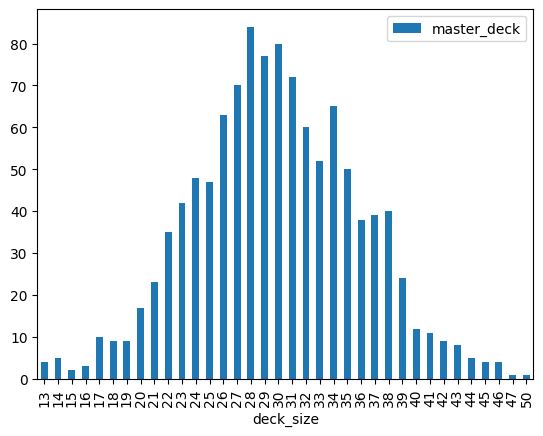

In [42]:
winning_decks.groupby = winning_decks.groupby(['deck_size']).count()
winning_decks.groupby.plot(kind = 'bar')

In [43]:
deck_df = df[['master_deck', 'floor_reached', 'character_chosen']].copy()
def deck_size_by_char(some_char): 
    # Obtain a boolean series based on whether heart was killed
    heart_kills = deck_df['floor_reached'] == 57
    # Obtain a boolean series based on character played
    if some_char == 'IRONCLAD': 
        char_runs = deck_df['character_chosen'] == 'IRONCLAD'
    elif some_char == 'THE_SILENT': 
        char_runs = deck_df['character_chosen'] == 'THE_SILENT'
    elif some_char == 'DEFECT': 
        char_runs = deck_df['character_chosen'] == 'DEFECT'
    else: 
        char_runs = deck_df['character_chosen'] == 'WATCHER'
    # Obtain a boolean series based on character played AND heart being killed
    heart_kills_by_char = heart_kills & char_runs
    # Obtain relic frequency in wins by character
    heart_kills_df = deck_df[heart_kills_by_char]
    heart_kills_df['deck_size'] = heart_kills_df['master_deck'].map(lambda x : len(x))
    heart_kills_deck_size = heart_kills_df['deck_size'].value_counts().sort_index()
    heart_kills_deck_size.plot(kind = "bar")

/var/folders/5k/9bdvmwvx17569nz_cwrw0dwc0000gn/T/ipykernel_6056/3311389314.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_kills_df['deck_size'] = heart_kills_df['master_deck'].map(lambda x : len(x))


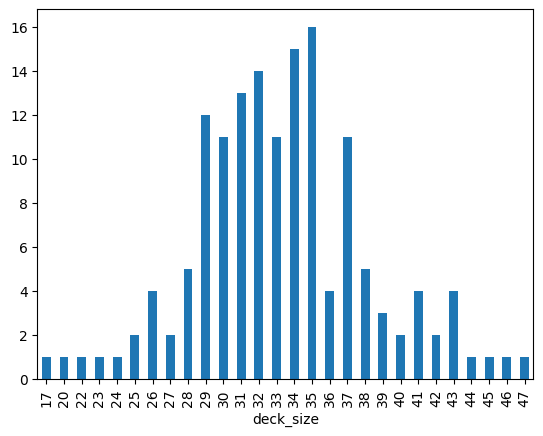

In [44]:
deck_size_by_char("IRONCLAD")

/var/folders/5k/9bdvmwvx17569nz_cwrw0dwc0000gn/T/ipykernel_6056/3311389314.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_kills_df['deck_size'] = heart_kills_df['master_deck'].map(lambda x : len(x))


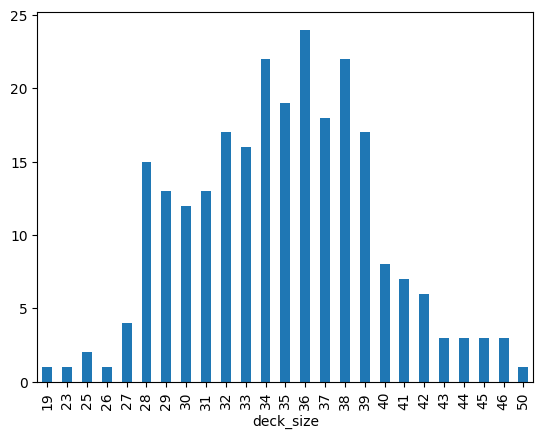

In [45]:
deck_size_by_char("THE_SILENT")

/var/folders/5k/9bdvmwvx17569nz_cwrw0dwc0000gn/T/ipykernel_6056/3311389314.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_kills_df['deck_size'] = heart_kills_df['master_deck'].map(lambda x : len(x))


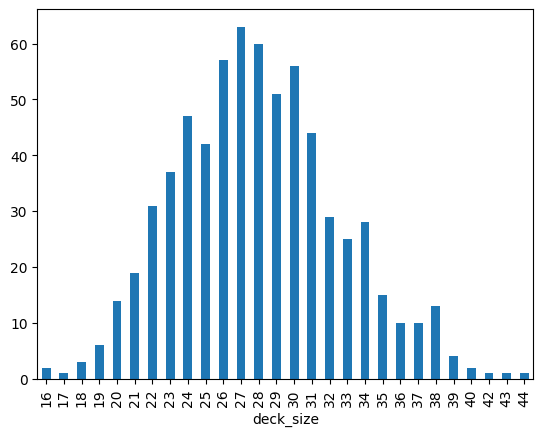

In [46]:
deck_size_by_char("DEFECT")

/var/folders/5k/9bdvmwvx17569nz_cwrw0dwc0000gn/T/ipykernel_6056/3311389314.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_kills_df['deck_size'] = heart_kills_df['master_deck'].map(lambda x : len(x))


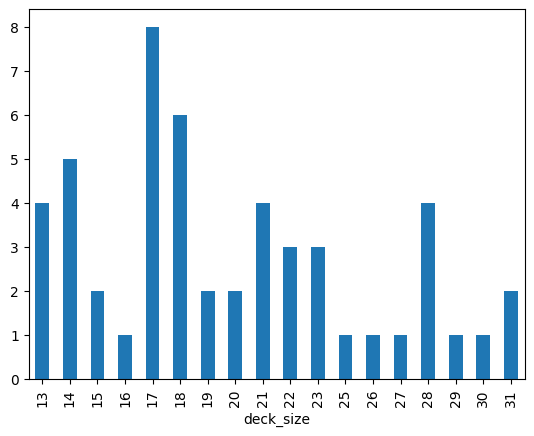

In [47]:
deck_size_by_char("WATCHER")

In [48]:
picked_df = df[['card_choices', 'floor_reached', 'character_chosen']].copy()

def get_pick_rate_dicts(df):
    picked = {}
    not_picked = {}
    for index, row in df.iterrows():
        for dict in row['card_choices']:
            for card in dict['not_picked']:
                not_picked[card] = not_picked.get(card, 0) + 1
            picked_card = dict['picked']
            picked[picked_card] = picked.get(picked_card, 0) + 1
    return picked, not_picked

def card_pick_rate_by_char(some_char):
    heart_kills = picked_df['floor_reached'] == 57
    if some_char == 'IRONCLAD': 
        char_runs = picked_df['character_chosen'] == 'IRONCLAD'
    elif some_char == 'THE_SILENT': 
        char_runs = picked_df['character_chosen'] == 'THE_SILENT'
    elif some_char == 'DEFECT': 
        char_runs = picked_df['character_chosen'] == 'DEFECT'
    else: 
        char_runs = picked_df['character_chosen'] == 'WATCHER'
    losing_runs = picked_df['floor_reached'] != 57
    heart_kills_by_char = heart_kills & char_runs
    losing_runs_by_char = losing_runs & char_runs
    losing_runs_df = picked_df[losing_runs_by_char]
    heart_kills_df = picked_df[heart_kills_by_char]
    winning_picked = {}
    winning_not_picked = {}
    losing_picked = {}
    losing_not_picked = {}
    winning_picked, winning_not_picked = get_pick_rate_dicts(heart_kills_df)
    losing_picked, losing_not_picked = get_pick_rate_dicts(losing_runs_df)
    dict_list = {"Skip_Frequency_in_Wins" : winning_not_picked, "Pick_Frequency_in_Wins" : winning_picked, 
                 "Skip_Frequency_in_Losses" : losing_not_picked, "Pick_Frequency_in_Losses" : losing_picked}
    final_picked_df = pd.DataFrame.from_dict(dict_list, orient = 'index')
    final_picked_df = final_picked_df.fillna(0)
    final_picked_df = final_picked_df.transpose()
    final_picked_df["Seen_in_Wins"] = final_picked_df["Skip_Frequency_in_Wins"] + final_picked_df["Pick_Frequency_in_Wins"]
    final_picked_df["Seen_in_loses"] = final_picked_df["Skip_Frequency_in_Losses"] + final_picked_df["Pick_Frequency_in_Losses"]
    final_picked_df["Seen"] = final_picked_df['Seen_in_loses'] + final_picked_df['Seen_in_Wins']
    final_picked_df["Pick_Rate"] = (final_picked_df['Pick_Frequency_in_Losses'] + final_picked_df['Pick_Frequency_in_Wins']) / final_picked_df['Seen']
    final_picked_df["Pick_Rate_In_Wins"] = np.where(final_picked_df["Seen_in_Wins"] == 0, 0, 
                                                    final_picked_df['Pick_Frequency_in_Wins']/final_picked_df['Seen_in_Wins'])
    final_picked_df["Pick_Rate_in_Losses"] = np.where(final_picked_df["Seen_in_loses"] == 0, 0, 
                                                      final_picked_df['Pick_Frequency_in_Losses']/final_picked_df["Seen_in_loses"])
    final_picked_df["Win_Rate_Estimate"] = final_picked_df['Pick_Frequency_in_Wins'] / final_picked_df["Seen"]
    print(final_picked_df)


In [49]:
card_pick_rate_by_char("IRONCLAD")

                    Skip_Frequency_in_Wins  Skip_Frequency_in_Losses  \
HandOfGreed                            6.0                       5.0   
Transmutation                          4.0                       8.0   
Pummel                                95.0                     207.0   
Armaments                            256.0                     550.0   
Clash                                300.0                     607.0   
...                                    ...                       ...   
Underhanded Strike                     0.0                       1.0   
Machine Learning                       0.0                       0.0   
DeusExMachina                          0.0                       0.0   
Hyperbeam                              0.0                       0.0   
Blade Dance                            0.0                       0.0   

                    Pick_Frequency_in_Losses  Pick_Frequency_in_Wins  \
HandOfGreed                              6.0                   

In [50]:
card_pick_rate_by_char("THE_SILENT")

                      Skip_Frequency_in_Wins  Pick_Frequency_in_Wins  \
Backstab                               171.0                    29.0   
Bane                                   468.0                     5.0   
PiercingWail                           238.0                   232.0   
Sucker Punch                           481.0                     6.0   
Prepared                               407.0                    35.0   
...                                      ...                     ...   
Deep Breath+1                            0.0                     3.0   
Master of Strategy+1                     0.0                     4.0   
Panacea+1                                0.0                     2.0   
Secret Technique+1                       0.0                     1.0   
Flash of Steel+1                         0.0                     0.0   

                      Skip_Frequency_in_Losses  Pick_Frequency_in_Losses  \
Backstab                                 295.0             

In [51]:
card_pick_rate_by_char("DEFECT")

                      Skip_Frequency_in_Wins  Pick_Frequency_in_Wins  \
Beam Cell                             1317.0                    71.0   
Redo                                  1335.0                    27.0   
Skim                                   438.0                    42.0   
White Noise                            403.0                    28.0   
Barrage                               1437.0                    24.0   
...                                      ...                     ...   
After Image                              0.0                     1.0   
Master of Strategy+1                     0.0                     1.0   
Shrug It Off                             0.0                     0.0   
Dagger Spray                             0.0                     0.0   
All Out Attack                           0.0                     0.0   

                      Skip_Frequency_in_Losses  Pick_Frequency_in_Losses  \
Beam Cell                               2225.0             

In [52]:
card_pick_rate_by_char("WATCHER")

                Skip_Frequency_in_Wins  Pick_Frequency_in_Wins  \
FlyingSleeves                    102.0                     1.0   
ThirdEye                          94.0                     6.0   
Prostrate                        111.0                     2.0   
DeceiveReality                    33.0                     3.0   
Ragnarok                          19.0                     0.0   
...                                ...                     ...   
PanicButton                        0.0                     1.0   
The Bomb                           0.0                     0.0   
Forethought+1                      0.0                     0.0   
Impatience                         0.0                     0.0   
Enlightenment                      0.0                     0.0   

                Skip_Frequency_in_Losses  Pick_Frequency_in_Losses  \
FlyingSleeves                      118.0                       0.0   
ThirdEye                           126.0                      17.0 

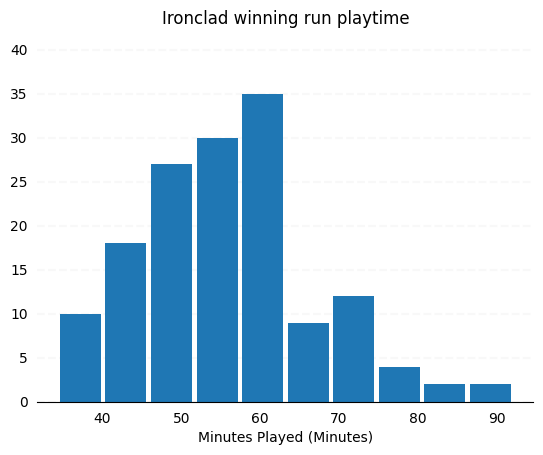

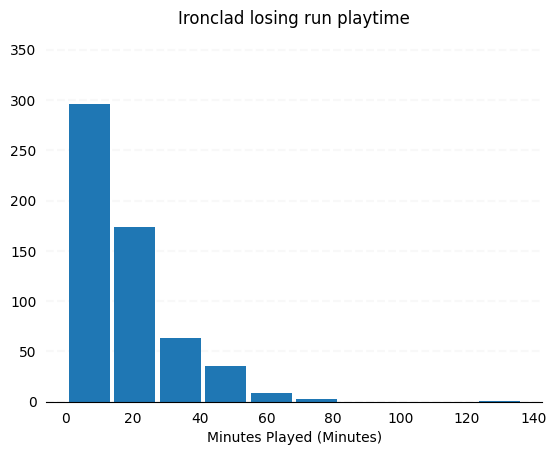

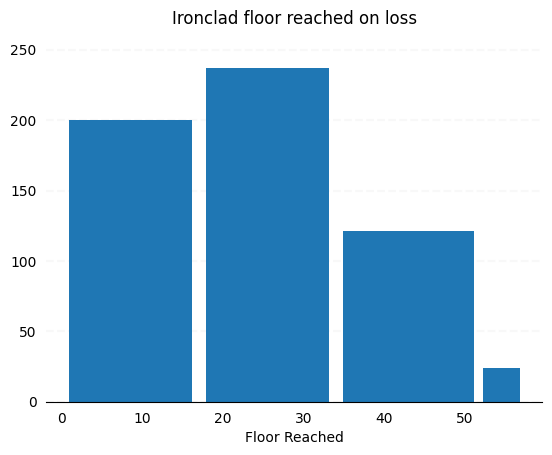

In [53]:
def make_histogram_look_better(hist, title, x_label):
    hist =  hist[0]
    for x in hist : 
        x.spines['right'].set_visible(False)
        x.spines['top'].set_visible(False)
        x.spines['left'].set_visible(False)

        x.tick_params(bottom=False, top=False, left=False, right=False)

        vals = x.get_yticks()
        for tick in vals:
            x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

        x.set_title(title)
        x.set_xlabel(x_label)
    return hist

def get_playtime_by_char(some_char):
    playtime_df = df[['playtime', 'floor_reached', 'character_chosen']].copy()
    heart_kills = playtime_df['floor_reached'] == 57
    playtime_df['playtime'] = playtime_df['playtime'].div(60).round(2)
    if some_char == 'IRONCLAD': 
        char_runs = playtime_df['character_chosen'] == 'IRONCLAD'
    elif some_char == 'THE_SILENT': 
        char_runs = playtime_df['character_chosen'] == 'THE_SILENT'
    elif some_char == 'DEFECT': 
        char_runs = playtime_df['character_chosen'] == 'DEFECT'
    else: 
        char_runs = playtime_df['character_chosen'] == 'WATCHER'
    losing_runs = playtime_df['floor_reached'] != 57
    heart_kills_by_char = heart_kills & char_runs
    losing_runs_by_char = losing_runs & char_runs
    winning_runs = playtime_df[heart_kills_by_char]
    losing_runs = playtime_df[losing_runs_by_char]
    win_hist = winning_runs.hist(column='playtime', bins = 10, grid = False, zorder=2, rwidth=0.9)
    make_histogram_look_better(win_hist, some_char.capitalize() + " winning run playtime",
                               "Minutes Played (Minutes)")
    win_hist
    lose_hist = losing_runs.hist(column='playtime', bins = 10, grid = False, zorder=2, rwidth=0.9)
    make_histogram_look_better(lose_hist, some_char.capitalize() + " losing run playtime",
                               "Minutes Played (Minutes)")
    floor_reached_bins = [0, 17, 34, 52, 57]
    floor_hist = losing_runs.hist(column='floor_reached', bins = floor_reached_bins, grid = False, zorder=2, rwidth=0.9)
    make_histogram_look_better(floor_hist, some_char.capitalize() + " floor reached on loss", 
                               "Floor Reached")

get_playtime_by_char("IRONCLAD")

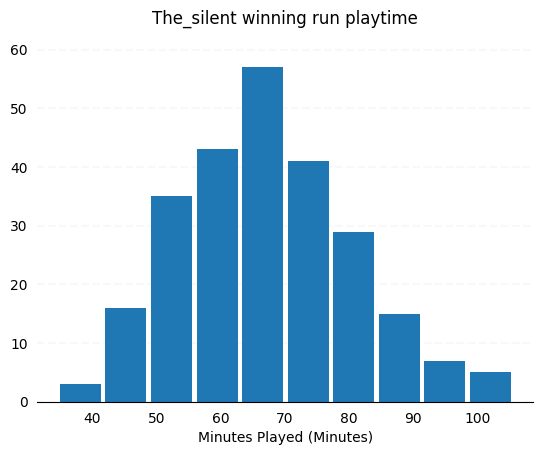

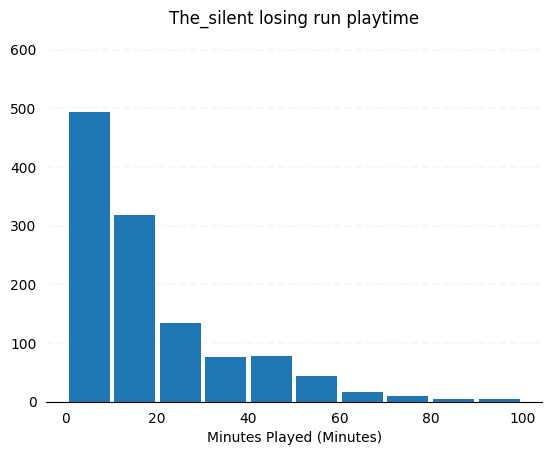

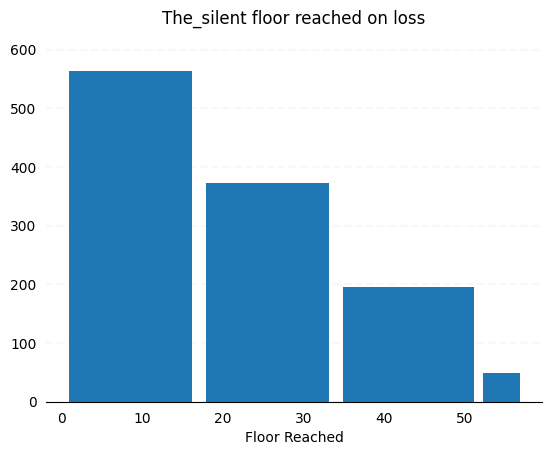

In [54]:
get_playtime_by_char("THE_SILENT")

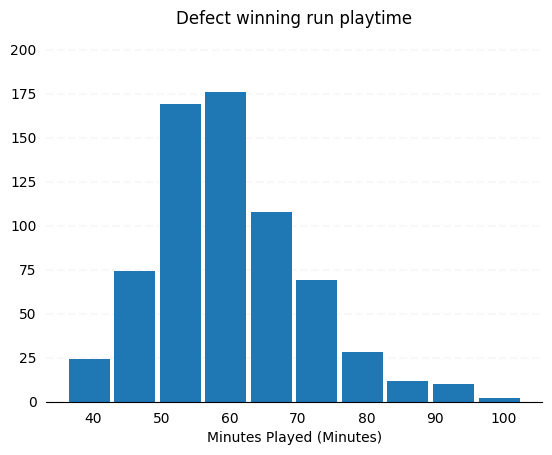

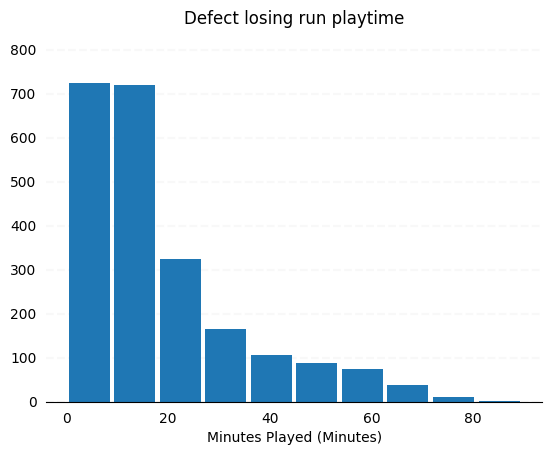

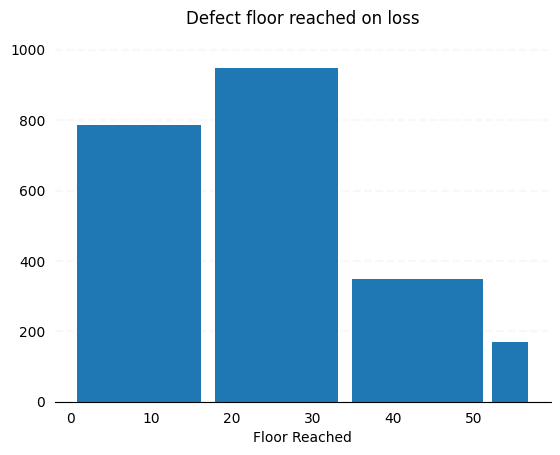

In [55]:
get_playtime_by_char("DEFECT")

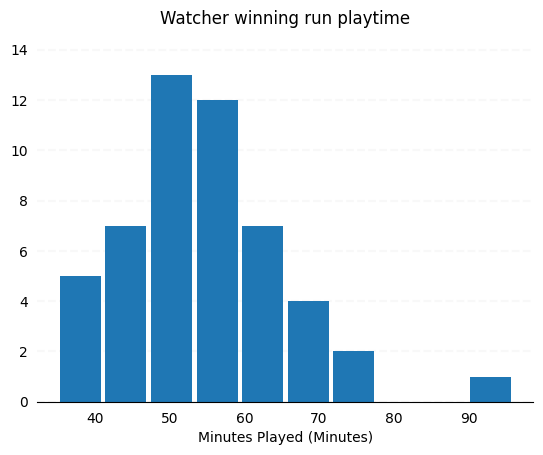

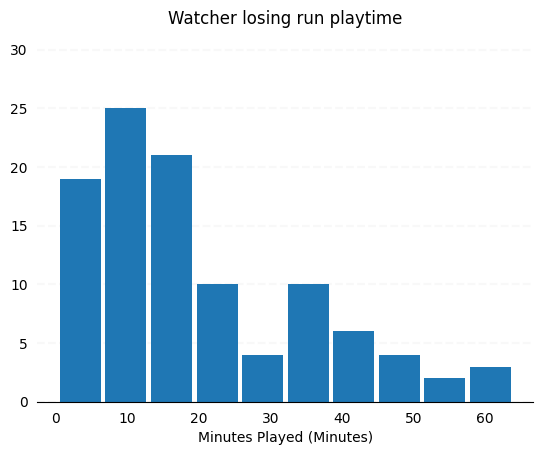

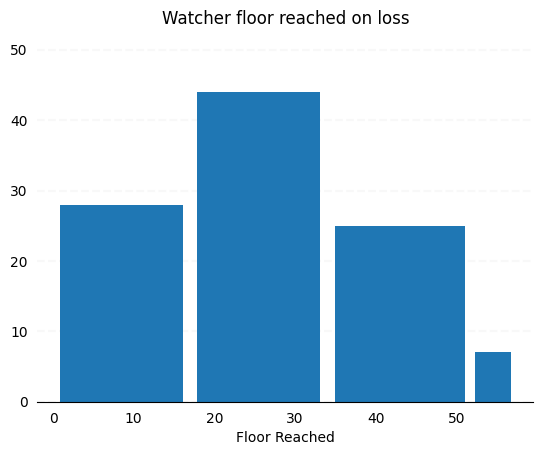

In [56]:
get_playtime_by_char("WATCHER")

In [57]:
df.columns

Index(['gold_per_floor', 'floor_reached', 'playtime', 'items_purged', 'score',
       'play_id', 'local_time', 'is_ascension_mode', 'campfire_choices',
       'neow_cost', 'seed_source_timestamp', 'circlet_count', 'master_deck',
       'relics', 'potions_floor_usage', 'damage_taken', 'seed_played',
       'potions_obtained', 'is_trial', 'path_per_floor', 'character_chosen',
       'items_purchased', 'campfire_rested', 'item_purchase_floors',
       'current_hp_per_floor', 'gold', 'neow_bonus', 'is_prod', 'is_daily',
       'chose_seed', 'campfire_upgraded', 'win_rate', 'timestamp',
       'path_taken', 'build_version', 'purchased_purges', 'victory',
       'max_hp_per_floor', 'relic_stats', 'card_choices', 'player_experience',
       'relics_obtained', 'event_choices', 'is_beta', 'boss_relics',
       'items_purged_floors', 'is_endless', 'potions_floor_spawned',
       'killed_by', 'ascension_level', 'special_seed', 'daily_mods'],
      dtype='object')

In [93]:
damage_taken_df = df[['damage_taken', 'floor_reached', 'character_chosen']].copy()

def get_damage_taken_df(df): 
    damage_taken_dict = {}
    damage_taken_count = {}
    damage_taken_freq = {}
    for index, row in df.iterrows():
        for dict in row['damage_taken']:
            damage_taken_dict[dict['enemies']] = damage_taken_dict.get(dict['enemies'], 0) + dict['damage']
            damage_taken_count[dict['enemies']] = damage_taken_count.get(dict['enemies'], 0) + 1
            damage_taken_freq[dict['enemies']] = damage_taken_freq.get(dict['enemies'], {})
            damage_taken_freq[dict['enemies']][dict['damage']] = damage_taken_freq[dict['enemies']].get(dict['damage'], 0) + 1
    total_damage_taken_df = pd.DataFrame.from_dict(damage_taken_dict, orient = 'index', columns=['Total Damage Taken'])
    total_encounters_df = pd.DataFrame.from_dict(damage_taken_count, orient = 'index', columns =['Times Encountered'])
    merge_df = pd.merge(total_damage_taken_df, total_encounters_df, left_index = True, right_index = True)
    merge_df['Average Damage Taken'] = merge_df['Total Damage Taken'] / merge_df['Times Encountered']
    merge_df = merge_df.sort_values(by=['Average Damage Taken'], ascending = False)
    return merge_df, damage_taken_freq

def get_damage_taken_dict(some_char):
    if some_char == 'IRONCLAD': 
        char_runs = damage_taken_df['character_chosen'] == 'IRONCLAD'
    elif some_char == 'THE_SILENT': 
        char_runs = damage_taken_df['character_chosen'] == 'THE_SILENT'
    elif some_char == 'DEFECT': 
        char_runs = damage_taken_df['character_chosen'] == 'DEFECT'
    else: 
        char_runs = damage_taken_df['character_chosen'] == 'WATCHER' 
    char_damage_taken_df = damage_taken_df[char_runs]
    win_and_loss_df, win_and_loss_freq = get_damage_taken_df(char_damage_taken_df)
    heart_kills = damage_taken_df['floor_reached'] == 57
    heart_kills_by_char = char_runs & heart_kills
    win_df, win_freq = get_damage_taken_df(damage_taken_df[heart_kills_by_char])
    return win_and_loss_df, win_df, win_and_loss_freq, win_freq

ironclad_total_damage, ironclad_damage_win, ironclad_win_and_loss_damage_freq, ironclad_win_damage_freq = get_damage_taken_dict("IRONCLAD")
ironclad_total_damage

,Total Damage Taken,Times Encountered,Average Damage Taken
The Heart,13110.0,167,78.502994
Awakened One,7479.0,137,54.591241
Shield and Spear,9154.0,173,52.913295
Collector,6289.0,125,50.312000
Time Eater,7009.0,143,49.013986
...,...,...,...
Looter,1509.0,230,6.560870
Small Slimes,2919.0,511,5.712329
2 Fungi Beasts,1017.0,212,4.797170
2 Louse,1890.0,495,3.818182


In [94]:
ironclad_damage_win

,Total Damage Taken,Times Encountered,Average Damage Taken
The Heart,11423.0,149,76.664430
Awakened One,4629.0,90,51.433333
Shield and Spear,7570.0,149,50.805369
Automaton,2274.0,47,48.382979
Time Eater,5255.0,109,48.211009
...,...,...,...
Small Slimes,555.0,108,5.138889
Looter,283.0,57,4.964912
2 Fungi Beasts,186.0,45,4.133333
2 Louse,404.0,115,3.513043


In [95]:
ironclad_win_and_loss_damage_freq

{'2 Louse': {4: 25,
  3.0: 48,
  2: 51,
  6.0: 27,
  0.0: 155,
  5: 32,
  1.0: 32,
  8: 19,
  10.0: 14,
  13.0: 4,
  11.0: 9,
  14.0: 4,
  9.0: 31,
  7.0: 26,
  12: 14,
  15.0: 2,
  16: 2},
 'Small Slimes': {7: 55,
  8.0: 23,
  0.0: 121,
  3.0: 22,
  10: 31,
  14: 11,
  12.0: 21,
  1: 28,
  4.0: 53,
  5.0: 33,
  2.0: 20,
  6: 15,
  15.0: 12,
  9.0: 26,
  19.0: 3,
  16: 9,
  11.0: 12,
  13: 5,
  30.0: 1,
  20: 2,
  23.0: 2,
  18.0: 3,
  17.0: 3},
 'Jaw Worm': {7: 96,
  4.0: 49,
  0.0: 80,
  9.0: 83,
  3.0: 6,
  11.0: 21,
  10.0: 4,
  23.0: 4,
  6.0: 19,
  14.0: 28,
  19.0: 5,
  2.0: 53,
  5.0: 10,
  8: 8,
  12.0: 18,
  16: 15,
  17: 5,
  13.0: 8,
  24: 4,
  21.0: 2,
  20.0: 1,
  1.0: 2,
  18.0: 3},
 'Lagavulin': {28: 11,
  18.0: 15,
  8: 9,
  6: 7,
  30.0: 31,
  10.0: 12,
  13: 14,
  0.0: 54,
  17: 18,
  51.0: 2,
  23.0: 10,
  3.0: 6,
  15.0: 23,
  33.0: 2,
  32: 3,
  36.0: 4,
  50: 4,
  9: 6,
  5.0: 9,
  35.0: 13,
  12.0: 10,
  16.0: 7,
  14.0: 9,
  39.0: 3,
  20.0: 40,
  58: 1,
  25.0

In [116]:
ironclad_win_damage_freq

{'Small Slimes': {7.0: 9,
  0.0: 26,
  5.0: 10,
  2.0: 5,
  10.0: 4,
  1: 9,
  15.0: 2,
  19.0: 1,
  4.0: 15,
  9.0: 6,
  11.0: 3,
  12.0: 6,
  16.0: 2,
  13.0: 2,
  6.0: 1,
  3.0: 3,
  8.0: 3,
  18.0: 1},
 'Cultist': {0.0: 34,
  3.0: 5,
  2.0: 5,
  1.0: 30,
  7: 8,
  6.0: 20,
  4.0: 5,
  12.0: 5,
  11: 1,
  23.0: 1},
 'Jaw Worm': {3.0: 3,
  2.0: 12,
  7.0: 18,
  4.0: 15,
  11.0: 2,
  8: 3,
  0.0: 21,
  14.0: 3,
  6.0: 4,
  9.0: 9,
  13.0: 2,
  12.0: 3,
  5.0: 3,
  24.0: 1,
  16.0: 6,
  21.0: 2,
  19.0: 2},
 'Gremlin Nob': {24.0: 6,
  6.0: 15,
  10.0: 9,
  32.0: 5,
  39.0: 1,
  42.0: 1,
  28.0: 2,
  12: 1,
  17: 1,
  8.0: 26,
  3.0: 4,
  20.0: 1,
  22.0: 1,
  0.0: 17,
  29.0: 4,
  11.0: 3,
  7.0: 1,
  25.0: 2,
  21.0: 3,
  23.0: 1,
  27.0: 2,
  18: 1,
  5.0: 3,
  31.0: 1,
  4.0: 2,
  55.0: 1,
  33.0: 1,
  34.0: 2,
  45.0: 1,
  19.0: 1,
  56.0: 1,
  9.0: 2,
  13.0: 2,
  2.0: 4,
  15.0: 2},
 'Exordium Thugs': {31.0: 1,
  22.0: 1,
  13: 2,
  14.0: 2,
  19.0: 2,
  9.0: 4,
  16.0: 4,
  26.0

In [115]:
for key in sorted(ironclad_win_damage_freq['The Heart']):
    print(key, ironclad_win_damage_freq['The Heart'][key])

0 4
1 1
2 2
3 1
4 1
6 4
7 2
8 2
9 1
10 1
12 2
13 1
14 1
15 1
16 1
17 2
18 2
19 1
21 1
22 1
23 1
24 2
25 1
28 1
30 1
32 1
33 2
34 2
36 1
37 1
38 3
39 1
40 3
41 1
42 1
44 3
45 1
46 1
47 3
48 3
51 2
52 2
54 2
55 1
56 2
59 5
60 1
61 1
62 1
63 2
64 1
65 2
67 1
69 3
70 1
73 1
75 2
79 1
80 1
81 1
84 1
85 1
86 1
91 1
92 1
95 1
96 1
99 1
100 2
103 1
107 1
108 1
110 1
111 1
112 1
113 1
115 1
118 1
119 2
122 2
123 1
128 1
130 1
132 1
134 1
139 1
151 1
157 1
158 1
163 1
169 2
170 1
179 1
180 1
182 1
186 1
210 1
214 1
224 1
225 1
233 1
234 1
248 1
252 1
258 1
308 1
318 1


In [97]:
silent_total_damge, silent_damage_win, silent_win_and_loss_damage_freq, silent_win_damage_freq = get_damage_taken_dict("THE_SILENT")
silent_total_damge

,Total Damage Taken,Times Encountered,Average Damage Taken
The Heart,9195.0,292,31.489726
Time Eater,4537.0,246,18.443089
Collector,3248.0,182,17.846154
Lagavulin Event,88.0,5,17.600000
Slime Boss,6411.0,367,17.468665
...,...,...,...
Orb Walker,493.0,323,1.526316
2 Fungi Beasts,614.0,404,1.519802
3 Shapes,445.0,311,1.430868
2 Louse,857.0,1080,0.793519


In [98]:
silent_damage_win

,Total Damage Taken,Times Encountered,Average Damage Taken
The Heart,7552.0,251,30.087649
Slime Boss,1209.0,76,15.907895
Hexaghost,1133.0,85,13.329412
Time Eater,2011.0,151,13.317881
Collector,1057.0,81,13.049383
...,...,...,...
Sphere and 2 Shapes,136.0,119,1.142857
Orb Walker,166.0,165,1.006061
2 Louse,184.0,202,0.910891
3 Shapes,124.0,153,0.810458


In [99]:
silent_win_and_loss_damage_freq

{'Small Slimes': {0.0: 544,
  2: 52,
  13: 3,
  4.0: 110,
  5: 33,
  1: 109,
  6.0: 25,
  15.0: 3,
  7.0: 57,
  8.0: 14,
  3.0: 40,
  17.0: 2,
  14.0: 2,
  9.0: 19,
  11: 5,
  10.0: 9,
  12.0: 9,
  18: 1},
 'Lagavulin': {0.0: 148,
  10.0: 36,
  24.0: 14,
  20: 18,
  4.0: 24,
  17: 24,
  37.0: 4,
  16.0: 24,
  14: 24,
  2.0: 21,
  15.0: 32,
  6: 22,
  12.0: 39,
  18: 24,
  19: 9,
  34: 5,
  22: 21,
  21.0: 14,
  5: 26,
  11.0: 12,
  31.0: 7,
  9.0: 17,
  1: 12,
  25: 21,
  32.0: 4,
  23.0: 9,
  3.0: 14,
  7.0: 38,
  13: 11,
  35.0: 7,
  40.0: 6,
  39: 4,
  29: 11,
  36: 4,
  28: 5,
  33: 9,
  8: 12,
  44.0: 2,
  47.0: 2,
  45.0: 1,
  41: 2,
  27: 7,
  26: 4,
  38: 4,
  30.0: 5,
  61: 1,
  48.0: 2,
  50.0: 1,
  43: 1,
  59.0: 1},
 '2 Louse': {0.0: 762,
  6: 15,
  3: 50,
  5.0: 14,
  12.0: 1,
  1: 119,
  9.0: 3,
  4.0: 38,
  2: 64,
  7: 9,
  10: 3,
  8.0: 2},
 'Cultist': {0.0: 577,
  3: 63,
  13.0: 5,
  1: 162,
  7: 23,
  6.0: 47,
  8.0: 14,
  4.0: 41,
  2: 38,
  5.0: 12,
  9.0: 12,
  11.

In [119]:
silent_win_damage_freq

{'Jaw Worm': {4: 17,
  0.0: 97,
  11.0: 5,
  2.0: 14,
  9.0: 3,
  1.0: 14,
  7.0: 6,
  6.0: 5,
  14.0: 1,
  13.0: 2,
  25.0: 1,
  3.0: 4,
  16.0: 1,
  15.0: 2,
  5.0: 4,
  10.0: 3,
  12: 3,
  8.0: 4},
 '2 Louse': {6: 6,
  0.0: 136,
  12.0: 1,
  4.0: 7,
  5.0: 3,
  2.0: 12,
  1: 26,
  3.0: 9,
  7.0: 1,
  9.0: 1},
 'Small Slimes': {0: 93,
  15.0: 2,
  7.0: 14,
  8.0: 4,
  4.0: 17,
  3.0: 8,
  2.0: 7,
  1.0: 20,
  10.0: 2,
  9.0: 3,
  12.0: 3,
  6.0: 3,
  5.0: 8,
  14.0: 1,
  11.0: 1},
 'Gremlin Nob': {34: 4,
  0: 53,
  21.0: 4,
  1.0: 5,
  14.0: 3,
  8.0: 23,
  35.0: 2,
  25.0: 4,
  7.0: 6,
  12.0: 3,
  11.0: 5,
  9.0: 5,
  6.0: 14,
  19.0: 3,
  33.0: 1,
  28.0: 1,
  10.0: 3,
  24.0: 5,
  32.0: 2,
  37.0: 2,
  29.0: 2,
  2.0: 3,
  13.0: 2,
  3.0: 5,
  22.0: 4,
  23.0: 3,
  18.0: 1,
  64.0: 1,
  26.0: 3,
  42.0: 1,
  4.0: 5,
  40.0: 1,
  20.0: 1,
  31.0: 3,
  5.0: 2,
  39.0: 1,
  36.0: 1},
 'Blue Slaver': {0: 43,
  2.0: 4,
  7: 1,
  1.0: 6,
  3.0: 8,
  4.0: 8,
  6.0: 3,
  9.0: 2,
  17.0: 

In [120]:
for key in sorted(silent_win_damage_freq['The Heart']):
    print(key, silent_win_damage_freq['The Heart'][key])

0 39
1 5
3 4
4 2
5 3
6 6
7 1
8 3
9 4
10 8
11 2
12 6
13 4
14 3
15 4
16 5
17 4
18 2
19 3
20 2
21 1
22 2
23 1
24 3
26 5
27 4
28 2
29 5
30 6
31 5
32 3
33 2
34 3
35 5
36 6
37 2
38 1
39 4
40 3
41 1
42 3
43 6
44 2
45 3
46 4
47 3
48 2
49 2
50 2
52 5
53 1
54 4
55 2
56 1
59 2
60 1
61 2
62 4
63 1
64 2
65 1
67 2
69 1
70 1
71 1
73 1
74 2
76 1
82 2
83 1
85 2
92 1
93 1
95 1
96 1
97 2
103 2
111 1
112 1


In [101]:
defect_total_damage, defect_damage_win, defect_win_and_loss_damage_freq, defect_win_damage_freq = get_damage_taken_dict("DEFECT")
defect_total_damage

,Total Damage Taken,Times Encountered,Average Damage Taken
The Heart,30029.0,797,37.677541
Shield and Spear,22913.0,840,27.277381
Lagavulin Event,427.0,20,21.350000
Awakened One,13129.0,618,21.244337
Collector,9081.0,442,20.545249
...,...,...,...
Mind Bloom Boss Battle,712.0,224,3.178571
Sphere and 2 Shapes,1525.0,501,3.043912
2 Fungi Beasts,2513.0,931,2.699248
2 Louse,4835.0,2144,2.255131


In [102]:
defect_damage_win

,Total Damage Taken,Times Encountered,Average Damage Taken
The Heart,23691.0,672,35.254464
Shield and Spear,15138.0,672,22.526786
Awakened One,7848.0,428,18.336449
Hexaghost,3500.0,202,17.326733
Lagavulin Event,173.0,10,17.300000
...,...,...,...
3 Shapes,1258.0,458,2.746725
2 Fungi Beasts,657.0,252,2.607143
Sphere and 2 Shapes,791.0,310,2.551613
2 Louse,1119.0,504,2.220238


In [103]:
defect_win_and_loss_damage_freq

{'Cultist': {1: 587,
  0.0: 1229,
  2.0: 77,
  7.0: 37,
  4.0: 33,
  3: 24,
  6: 110,
  10: 2,
  12.0: 7,
  5: 6,
  9: 3,
  11.0: 4,
  8.0: 3,
  16: 1,
  18: 1,
  19: 1},
 'Small Slimes': {3: 132,
  4: 198,
  0.0: 823,
  10: 81,
  6: 56,
  15: 30,
  5.0: 131,
  7.0: 210,
  1: 127,
  12: 53,
  8: 67,
  30: 1,
  14: 23,
  9.0: 65,
  2.0: 97,
  11: 48,
  16: 10,
  18.0: 9,
  13.0: 18,
  22.0: 2,
  19.0: 1,
  21: 2,
  20.0: 1,
  17.0: 3,
  24: 1},
 'Jaw Worm': {2: 488,
  5: 67,
  0.0: 509,
  1: 19,
  4.0: 206,
  7: 451,
  12: 87,
  10.0: 23,
  3: 19,
  9.0: 96,
  6: 17,
  8.0: 18,
  14: 27,
  11: 14,
  13.0: 2,
  19.0: 6,
  17.0: 1,
  21.0: 2,
  23.0: 1,
  16: 4},
 'Lots of Slimes': {15: 9,
  5.0: 22,
  0: 117,
  20: 6,
  18: 9,
  19: 9,
  13.0: 16,
  26.0: 1,
  7.0: 30,
  12.0: 22,
  21.0: 3,
  16: 13,
  6.0: 28,
  3: 11,
  4: 21,
  8.0: 24,
  2.0: 16,
  10: 17,
  9: 17,
  1.0: 17,
  30.0: 3,
  11.0: 15,
  14: 9,
  23: 5,
  22: 7,
  17.0: 12,
  27.0: 1,
  34: 1,
  24: 2,
  25.0: 2,
  33.0

In [104]:
defect_win_damage_freq

{'Small Slimes': {0.0: 194,
  9.0: 17,
  2.0: 29,
  14: 7,
  5.0: 29,
  3.0: 34,
  6.0: 10,
  7.0: 52,
  1.0: 30,
  4.0: 53,
  12: 16,
  8.0: 15,
  18.0: 1,
  13.0: 2,
  11.0: 5,
  19.0: 1,
  10.0: 14,
  15.0: 5,
  20.0: 1,
  17.0: 1},
 '2 Louse': {8.0: 15,
  2.0: 44,
  3.0: 49,
  1.0: 44,
  0.0: 257,
  7.0: 16,
  5.0: 13,
  6.0: 13,
  4.0: 15,
  10.0: 15,
  9.0: 12,
  15: 4,
  14.0: 2,
  12.0: 2,
  11.0: 2,
  13.0: 1},
 'Cultist': {0.0: 303,
  1.0: 136,
  4.0: 7,
  7.0: 8,
  6: 23,
  2.0: 12,
  5.0: 1,
  9: 2,
  11.0: 1,
  3.0: 2},
 'Blue Slaver': {3.0: 32,
  0.0: 73,
  2.0: 15,
  12.0: 4,
  7.0: 10,
  11.0: 16,
  9.0: 9,
  8.0: 22,
  5.0: 10,
  1.0: 14,
  13.0: 5,
  6.0: 12,
  14.0: 3,
  4: 19,
  10: 3,
  15.0: 1,
  17.0: 1,
  16.0: 1,
  19.0: 1},
 'Exordium Wildlife': {4.0: 10,
  17.0: 3,
  0.0: 57,
  7.0: 11,
  9.0: 5,
  8: 5,
  15: 5,
  2.0: 8,
  5.0: 14,
  19.0: 3,
  12.0: 11,
  1.0: 16,
  10.0: 6,
  13.0: 6,
  6.0: 8,
  21.0: 1,
  16.0: 2,
  25.0: 1,
  3.0: 4,
  11.0: 4,
  18.0:

In [121]:
for key in sorted(defect_win_damage_freq['The Heart']):
    print(key, defect_win_damage_freq['The Heart'][key])

0 35
1 6
2 8
3 5
4 11
5 6
6 5
7 10
8 14
9 3
10 10
11 7
12 13
13 1
14 15
15 6
16 15
17 14
18 12
19 9
20 8
21 13
22 8
23 15
24 13
25 12
26 8
27 9
28 7
29 8
30 13
31 9
32 9
33 15
34 8
35 7
36 6
37 12
38 10
39 14
40 4
41 7
42 7
43 13
44 10
45 6
46 6
47 8
48 8
49 9
50 8
51 8
52 7
53 9
54 6
55 9
56 5
57 5
58 7
59 8
60 7
61 8
62 4
63 10
64 8
65 2
66 7
67 3
68 2
69 3
70 1
72 1
73 6
74 6
75 2
76 2
77 3
78 4
79 7
80 1
82 2
83 2
84 2
86 2
88 2
92 2
93 1
95 1
96 1
98 1
103 2
104 2
106 1
108 1
109 1
110 1
116 1
121 1


In [107]:
watcher_total_damage, watcher_damage_win, watcher_win_and_loss_damage_freq, watcher_win_damage_freq = get_damage_taken_dict("WATCHER")
watcher_total_damage

,Total Damage Taken,Times Encountered,Average Damage Taken
The Heart,1452.0,55,26.400000
Time Eater,954.0,43,22.186047
The Guardian,996.0,45,22.133333
Automaton,542.0,27,20.074074
Hexaghost,756.0,42,18.000000
...,...,...,...
Large Slime,64.0,37,1.729730
Transient,76.0,46,1.652174
Colosseum Slavers,3.0,2,1.500000
Cultist,66.0,117,0.564103


In [108]:
watcher_damage_win

,Total Damage Taken,Times Encountered,Average Damage Taken
The Heart,1233.0,51,24.176471
The Guardian,382.0,18,21.222222
Automaton,168.0,9,18.666667
Hexaghost,292.0,17,17.176471
Collector,274.0,17,16.117647
...,...,...,...
Spheric Guardian,30.0,25,1.200000
Transient,23.0,28,0.821429
Sphere and 2 Shapes,21.0,26,0.807692
Large Slime,3.0,9,0.333333


In [109]:
watcher_win_and_loss_damage_freq

{'Jaw Worm': {7: 21,
  2: 20,
  12.0: 6,
  9.0: 2,
  0.0: 51,
  10.0: 1,
  4.0: 10,
  8: 2,
  11.0: 1,
  13: 1},
 'Cultist': {0: 92, 7.0: 2, 6.0: 2, 4.0: 2, 1.0: 10, 2: 7, 3.0: 1, 5: 1},
 '2 Louse': {7: 10,
  0: 57,
  3.0: 4,
  14.0: 1,
  11.0: 1,
  2.0: 10,
  10.0: 5,
  6.0: 5,
  4.0: 4,
  5: 5,
  9: 1,
  8.0: 2},
 'Gremlin Nob': {16: 12,
  4.0: 3,
  13.0: 2,
  0: 64,
  6: 11,
  22.0: 2,
  14.0: 1,
  18.0: 3,
  9.0: 2,
  8.0: 11,
  3: 7,
  12.0: 2,
  29: 1,
  32: 1,
  11.0: 2,
  27: 1,
  7.0: 2,
  2.0: 1,
  26.0: 1,
  10.0: 1,
  1.0: 1},
 'Looter': {1: 6,
  0.0: 20,
  3: 2,
  2.0: 3,
  11: 2,
  4.0: 3,
  14: 1,
  6.0: 3,
  7.0: 1,
  5.0: 1},
 '3 Sentries': {20: 9,
  22: 3,
  12: 8,
  3.0: 4,
  5: 9,
  6.0: 2,
  2.0: 17,
  1.0: 2,
  7.0: 10,
  15.0: 8,
  40.0: 2,
  10.0: 7,
  9.0: 1,
  26.0: 1,
  31.0: 2,
  27: 5,
  0.0: 9,
  8.0: 6,
  24: 5,
  25: 3,
  17: 4,
  11.0: 2,
  14: 2,
  13.0: 2,
  38.0: 1,
  19.0: 2,
  32.0: 2,
  16: 1,
  21.0: 1,
  60: 1,
  33.0: 1,
  18: 2,
  35.0: 1,
  4

In [110]:
watcher_win_damage_freq

{'Jaw Worm': {2.0: 6, 7.0: 10, 9.0: 1, 0.0: 20, 10.0: 1, 4.0: 5, 11.0: 1},
 '2 Louse': {7.0: 1,
  14.0: 1,
  11.0: 1,
  3.0: 1,
  0.0: 16,
  4.0: 2,
  6.0: 4,
  2.0: 3,
  10.0: 1,
  5.0: 2,
  8.0: 1},
 'Cultist': {4.0: 1, 1.0: 3, 0.0: 31, 3.0: 1},
 'Lagavulin': {16.0: 2,
  0.0: 16,
  10.0: 2,
  18.0: 2,
  19.0: 1,
  14.0: 2,
  6.0: 1,
  12.0: 2,
  7.0: 3,
  20.0: 1,
  1.0: 1,
  5.0: 1,
  13.0: 1,
  22.0: 2,
  4.0: 1,
  15.0: 2,
  11.0: 1,
  32.0: 1},
 'Gremlin Gang': {0.0: 3, 10.0: 1, 5.0: 2, 15.0: 1, 9.0: 1},
 '3 Sentries': {1.0: 2,
  7.0: 5,
  20.0: 4,
  2.0: 6,
  12.0: 4,
  9.0: 1,
  10.0: 2,
  26.0: 1,
  0.0: 2,
  5.0: 5,
  15.0: 2,
  17.0: 2,
  11.0: 2,
  13.0: 1,
  38.0: 1,
  19.0: 1,
  32.0: 1,
  24.0: 2,
  40.0: 1,
  35.0: 1,
  18.0: 1,
  27.0: 1,
  8.0: 2,
  30.0: 1},
 'Gremlin Nob': {22.0: 2,
  0.0: 27,
  6.0: 2,
  14.0: 1,
  12.0: 1,
  18.0: 1,
  8.0: 5,
  16.0: 4,
  7.0: 1,
  4.0: 1,
  10.0: 1,
  1.0: 1},
 'The Guardian': {0.0: 2,
  16.0: 1,
  39.0: 2,
  23.0: 2,
  31.0: 1,